  <style>
    .container {
      display: flex;
      justify-content: space-between;
      align-items: center;
    }

    .text {
      width: 95%;
       text-align: center;
    }

    .image {
      width: 5%;
      text-align: center; 
    }

    
    .image img {
      max-width: 100%;
      height: auto;
    }
  </style> 
  
  <div class="container">
    <div class="image">
      <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Logo_KIT.svg/1200px-Logo_KIT.svg.png" width=100 height=50/>
    </div>
        <div class="text">
      <h1> Medical Image Processing and Navigation 2024/25</h1>
    </div>
  </div>

---

<center>
<h2>Deep Learning</h2> 
<img src="https://www.datasciencecentral.com/wp-content/uploads/2021/10/3846901165-1.jpeg"/>


---

<center>
Lecturer: <b><i>Ciro Benito Raggio</i></b> 
<br/>
<a><href>https://www.ibt.kit.edu/english/Raggio_C.php</href></a>

# Introduction to Deep Learning
The Deep Learning (DL) concept uses artificial neural networks with many layers (deep neural networks) to analyze large amounts of data. These networks are inspired by the structure and function of the human brain.

DL is particularly effective in fields such as image recognition, natural language processing and also shows satisfactory results in the medical field, where feature extraction often cannot be done systematically.

### What are Neural Networks
Neural networks are made up of fundamental units called **neurons**. Each neuron receives one or more inputs, processes them through an activation function and produces an output.

<center><img src="https://miro.medium.com/v2/resize:fit:578/1*ToPT8jnb5mtnikmiB42hpQ.png" height=600 width=900 /></center>

### Structure of a neuron
An artificial neuron can be described by three main components:

- **Input**: numerical values ​​representing the input data

- **Weight**: coefficient that weights the importance of each input

- **Activation function**: a non-linear function that determines the output of the neuron.

### What are layers?
Neurons are organized in layers:

- **Input Layer**: receives the raw data

- **Hidden Layers**: intermediate layers that process the data. A network with many hidden layers is called a deep network

- **Output Layer**: produces the final result.

The data is propagated through the neurons of one layer to be transformed and passed to the next, until the final output is produced.

<center><img src="https://imarticus.org/blog/wp-content/uploads/2020/04/deep.gif" height=600 width=900 /></center>



# Convolutional Neural Networks (CNN)

CNNs are a type of neural network specifically designed to process and recognize images using multiple convolution process to extract significant features!

<center><img src="https://media.licdn.com/dms/image/D5612AQGOui8XZUZJSA/article-cover_image-shrink_720_1280/0/1680532048475?e=2147483647&v=beta&t=8aodfukDSrrnnxOVSNobKYJtbtSDB7yC83LUky-Ob68" /></center>

They are composed of different layers:
- **Convolutional layers**: apply kernel filters to extract features from images

- **Pooling layers**: reduce the size of feature maps

- **Fully connected layers**: used for final classification.

<center><img src="https://www.louisbouchard.ai/content/images/2021/04/1_QPRC1lcfYxcWWPAC2hrQgg.gif" height=600 width=1200 /></center>


## Explore CNN in depth!
https://poloclub.github.io/cnn-explainer/

## How to build, train and test a CNN with PyTorch

Let's start with a rather simple problem for a classic CNN: classifying generic images.

We will use the public CIFAR10 dataset, which can be easily downloaded with the torchvision library, and which contains images of different types with the corresponding labels (our target for the classification task).

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

### Step 1. Collect data and define batch size

***What does "batch size" mean?***  

To clarify the concept of batch size, it is useful to explain what epochs are in the world of deep learning!

An ***epoch*** is a complete cycle through the entire dataset during the process of training a neural network. 

**For each epoch**:
1. The model sees each example in the dataset once

2. The model weights are updated based on each batch of examples

3. After seeing all the data, the epoch is complete.

To summarize, we could define:

- **Batch**: a group of examples that are passed through the network in a single iteration

- **Iteration**: a single pass of a batch through the network

- **Epoch**: a complete pass of all batches in the dataset.

Example:

- If you have 1000 images and use a batch size of 100, it will take 1000/100 = 10 iterations to complete an epoch.

- During each epoch, the network will see all 1000 images once.

### The impact of the batch size
<center>
<img src="./assets/batch_size_impact.png">
</center>

In [2]:
def imshow_w_denorm(img):
    img = img / 2 + 0.5 # de-normalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
BATCH_SIZE = 8

# Operations to perform on each image in the dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Download the train and test sets of CIFAR10 with torchvision
trainset = torchvision.datasets.CIFAR10(root='./cifar10', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./cifar10', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

NUM_CLASSES = len(classes)

# First iteration on the train dataset to collect a batch of images 
for images, labels in trainloader:
    print(images.size(), labels.size())
    break

imshow_w_denorm(torchvision.utils.make_grid(images))
print('Labels: '+', '.join('%5s' % classes[labels[j]] for j in range(BATCH_SIZE)))


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)>

### Step 2. CNN architecture

Let's build a simple CNN! To do this we need to create a class that inherits from nn.Module, the base class for all neural network modules in PyTorch.

Afterwards, this class must contain the ***forward*** method (the instructions that will be applied to the images when we ask the model to make the prediction).

In [3]:
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Define CNN layers
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 6, kernel_size = 5) # First convolution!
                                        # Defines a convolutional layer with: 3 input channels (for example an RGB image), 
                                        #                                     6 output channels, 
                                        #                                     a kernel (filter) of size 5x5.
        
        self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2) # Defines a pooling layer with a window of 2x2 and a stride of 2. 
                                       # This reduces the spatial dimension (width and height) of the feature maps.
                                       
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5) # Second convolution: 6 input channels, 16 output channels, 5x5 kernel
        
        # Fully connected layer
        self.fc1 = nn.Linear(in_features = 16 * 5 * 5, out_features = 120) # 400 input neurons, 120 output neurons
        self.fc2 = nn.Linear(in_features = 120, out_features = 84) # 120 input neurons, 84 output neurons
        
        # Final layer
        self.fc3 = nn.Linear(in_features = 84, out_features = NUM_CLASSES) # 84 input neurons, 10 output neurons

    def forward(self, x):
        # Apply CNN layers
    
        conv_1_out = self.pool(
            F.relu(
            self.conv1(x)
            )) # convolution -> relu -> pooling
        conv_2_out = self.pool(
            F.relu(
            self.conv2(conv_1_out))) # convolution -> relu -> pooling
        
        flatten = conv_2_out.view(-1, 16 * 5 * 5) # Flattens data from a 4D format (batch_size, channels, height, width) 
                                   # to a 2D format (batch_size, input neurons) for input into fully connected layers.
        
        x = F.relu(self.fc1(flatten)) # Fully connected layer 1
        x = F.relu(self.fc2(x)) # Fully connected layer 2
        
        final_pred = self.fc3(x) # Fully connected layer 3 -> x is the final prediction
        
        return final_pred

net = CNN()

### Step 3. Train settings

After creating the network we must establish which criterion to use to calculate the error that the network makes with each prediction. 

The choice of the criterion is very important because it quantifies the errors the network makes and the weights are updated accordingly.

We must also choose the optimizer, i.e. the function that allows us to optimize our cost function.

In general, optimizers are based on the concept of gradient descent, so with the "learning rate" parameter we specify how small the steps to find the minimum must be.

<center><img src="https://mpopov.com/images/adam-animated.gif" height=300 width=500></center>

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
epochs = 5
device="cuda"

net.to(device)

CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

### Step 4. Training the model

In [6]:
for epoch in range(epochs): 
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get the input data
        inputs, labels = data

        # Reset the gradients of the optimizers
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs.to(device))
        loss = criterion(outputs.to(device), labels.to(device))
        
        # Backward pass
        loss.backward()
        # Optimization
        optimizer.step()

        running_loss += loss.item()
        
        # Print the statistics every N mini-batch
        if i % 2000 == 1999:  
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finish!')


Epoch 1, Batch 2000, Loss: 1.758
Epoch 1, Batch 4000, Loss: 1.473
Epoch 1, Batch 6000, Loss: 1.400
Epoch 2, Batch 2000, Loss: 1.304
Epoch 2, Batch 4000, Loss: 1.252
Epoch 2, Batch 6000, Loss: 1.243
Epoch 3, Batch 2000, Loss: 1.155
Epoch 3, Batch 4000, Loss: 1.153
Epoch 3, Batch 6000, Loss: 1.137
Epoch 4, Batch 2000, Loss: 1.088
Epoch 4, Batch 4000, Loss: 1.073
Epoch 4, Batch 6000, Loss: 1.061
Epoch 5, Batch 2000, Loss: 0.999
Epoch 5, Batch 4000, Loss: 1.024
Epoch 5, Batch 6000, Loss: 1.027
Finish!


### Step 5. Testing the model and results evaluation

To understand how our model ranks test data, we can rely on several metrics:

<center><img src="https://www.researchgate.net/publication/367393140/figure/fig4/AS:11431281114710300@1674648981676/Confusion-matrix-Precision-Recall-Accuracy-and-F1-score.jpg" /></center>

,Class,Accuracy (%),Precision,Recall,F1 Score
0,plane,67.7,0.644148,0.677,0.660166
1,car,76.8,0.649197,0.768,0.703619
2,bird,57.9,0.460621,0.579,0.513070
3,cat,42.0,0.409756,0.420,0.414815
4,deer,50.1,0.539871,0.501,0.519710
5,dog,45.0,0.539568,0.450,0.490731
6,frog,69.8,0.666667,0.698,0.681974
7,horse,55.7,0.792319,0.557,0.654140
8,ship,75.6,0.626866,0.756,0.685403
9,truck,56.1,0.732376,0.561,0.635334


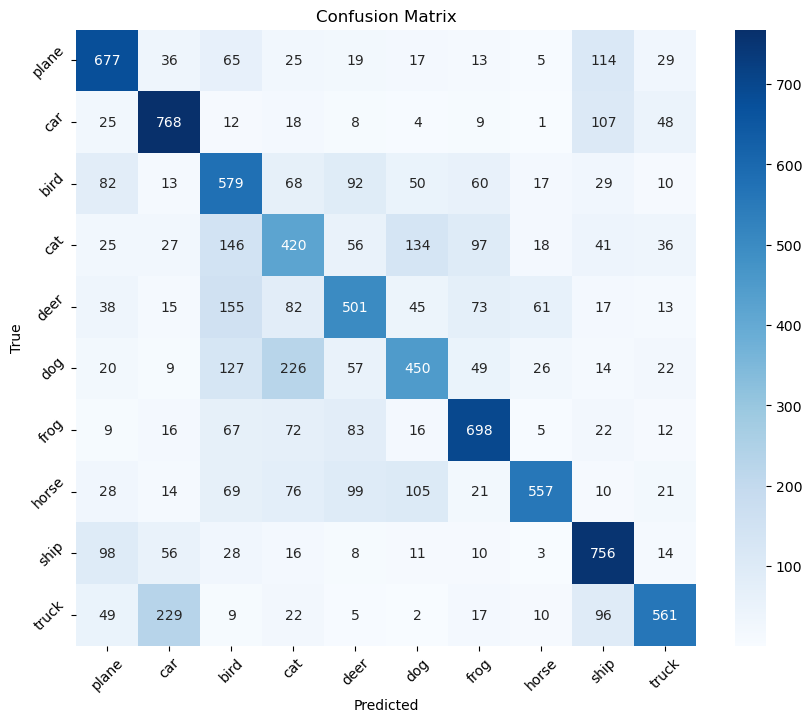

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import seaborn as sns
import pandas as pd

class_correct = list(0. for i in range(NUM_CLASSES))
class_total = list(0. for i in range(NUM_CLASSES))

all_labels = []
all_preds = []

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device))
        _, predicted = torch.max(outputs.to(device), 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

        c = (predicted.to(device) == labels.to(device)).squeeze()
        for i in range(labels.size(0)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

all_labels = np.array(all_labels)
all_preds = np.array(all_preds)

# Calculation of different metrics: accuracy, precision, recall, F1 score and confusion matrix
accuracies = [100 * class_correct[i] / class_total[i] if class_total[i] > 0 else float('nan') for i in range(NUM_CLASSES)]
precision = precision_score(all_labels, all_preds, average=None)
recall = recall_score(all_labels, all_preds, average=None)
f1 = f1_score(all_labels, all_preds, average=None)
conf_matrix = confusion_matrix(all_labels, all_preds)

# Use pandas to create a metrics report
data = {
    'Class': classes,
    'Accuracy (%)': accuracies,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

df = pd.DataFrame(data)
display(df)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(ticks=np.arange(NUM_CLASSES)+0.5, labels=classes, rotation=45)
plt.yticks(ticks=np.arange(NUM_CLASSES)+0.5, labels=classes, rotation=45)
plt.title('Confusion Matrix')
plt.show()


### Results analyses

From the metrics report, we can see that the model is not equally good on all classes, which may depend on the characteristics of the image, on the distribution of the images, but also on the model architecture. 

The confusion matrix allows us to better understand how the model behaves during classification. For example, it is easy to understand that when the model is asked to classify an airplane, it is often confused with a ship, a bird, or a deer. Or when asked to classify a dog, it often confuses it with a cat!

# CNNs in the medical field

<center><img src="https://pub.mdpi-res.com/sustainability/sustainability-15-05930/article_deploy/html/images/sustainability-15-05930-g004.png?1680083216" height=600 width=900 /></center>

CNNs are widely used in the medical field for several applications, including:

- Diagnosis of radiological images (e.g. X-rays, MRI)
- Detection of tumors in tissue images
- Segmentation of medical images for detailed analysis of anatomical structures
- Classification of dermatological images to diagnose skin diseases

## Bonus - Hey model, why did you say that? Explain model prediction with GradCAM

**Grad**ient-weighted **C**lass **A**ctivation **M**apping (Grad-CAM) is an interpretability technique for CNNs that highlights the regions of an image most relevant to a given model prediction. 

It uses the gradients of the output with respect to the **last** convolutional layers to generate an activation map, superimposing it on the original image. This helps to understand which visual features most influenced the network decision, proving useful for debugging, explaining AI models and identifying biases or errors.

<center>
<img src="https://www.researchgate.net/publication/343182251/figure/fig1/AS:941673861369890@1601523952685/Examples-of-the-gradient-weighted-class-activation-mapping-Grad-CAM-21.jpg" />
</center>

Nowadays, there are various libraries available to extract Grad-CAM from our model, an example for PyTorch is: https://github.com/jacobgil/pytorch-grad-cam.git

# References
[Classification task with PyTorch](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)